In [9]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from  sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [10]:
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 18,
    "axes.titlesize": 18,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "figure.figsize": (12, 6),
    "figure.dpi": 100,
    "savefig.dpi": 200,
    "savefig.format": "png",
    "savefig.transparent": True,
    "axes.grid": True,
    "grid.linewidth": 0.5,
    "grid.linestyle": "--",
    "grid.color": "0.8",
    "image.cmap": "Blues",
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
    "text.usetex": True, "mathtext.fontset": "cm",
    "pgf.preamble": r"\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage{cmbright}"
})


In [11]:
data_files = glob.glob("../GSA_1024/phase_plot*.csv")
data_files

['../GSA_1024/phase_plot_data_total_Clustering_sample_1024_step_150.csv',
 '../GSA_1024/phase_plot_data_Fights_per_step_sample_1024_step_50.csv',
 '../GSA_1024/phase_plot_data_Fights_per_step_sample_1024_step_100.csv',
 '../GSA_1024/phase_plot_data_Cooperation_per_step_sample_1024_step_50.csv',
 '../GSA_1024/phase_plot_data_Cooperation_per_step_sample_1024_step_150.csv',
 '../GSA_1024/phase_plot_data_Cooperation_per_step_sample_1024_step_100.csv',
 '../GSA_1024/phase_plot_data_Fights_per_step_sample_1024_step_150.csv',
 '../GSA_1024/phase_plot_data_total_Clustering_sample_1024_step_50.csv',
 '../GSA_1024/phase_plot_data_total_Clustering_sample_1024_step_100.csv',
 '../GSA_1024/phase_plot_data_Cooperation_per_step_sample_1024_step_200.csv',
 '../GSA_1024/phase_plot_data_total_Clustering_sample_1024_step_200.csv',
 '../GSA_1024/phase_plot_data_Fights_per_step_sample_1024_step_200.csv']

In [12]:
df = pd.read_csv(data_files[0])
df = df.drop(["result", "alpha"], axis=1)

for dir in data_files:
    new_df = pd.read_csv(dir)
    step = dir.split("_")[-1].replace(".csv", "")
    depend_name =  "fights" if "Fight" in dir else "cooperations" if "Cooperation" in dir else "clustering"
    print(f"Data for {depend_name}, at step {step}")
    new_df['step'] = step
    dependent = new_df['result']
    df[depend_name] = dependent

df.columns = map(lambda x: x.replace("_", " ").capitalize(), df.columns)
    

Data for clustering, at step 150
Data for fights, at step 50
Data for fights, at step 100
Data for cooperations, at step 50
Data for cooperations, at step 150
Data for cooperations, at step 100
Data for fights, at step 150
Data for clustering, at step 50
Data for clustering, at step 100
Data for cooperations, at step 200
Data for clustering, at step 200
Data for fights, at step 200


In [13]:
outcomes = ['Fights', 'Cooperations', 'Clustering']
predictors = [col for col in df.columns if col not in outcomes]

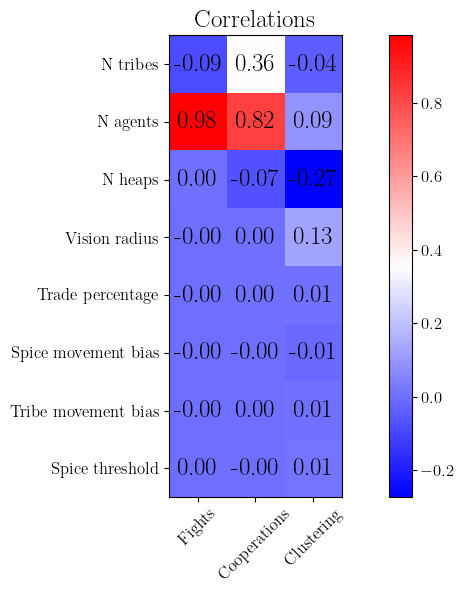

In [14]:
def corr_mat(df, x, y):
    correlation_matrix = df.corr()[y].loc[x]

    # Plotting the correlation matrix using imshow
    plt.imshow(correlation_matrix, cmap='bwr', interpolation='none', vmin=np.min(correlation_matrix), vmax=np.max(correlation_matrix))
    plt.grid(False)
    plt.colorbar()

    # Adding tick labels
    plt.xticks(ticks=np.arange(len(y)), labels=y, rotation=45)
    plt.yticks(ticks=np.arange(len(x)), labels=x)

    # Adding the values of the correlation matrix on the heatmap
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.index)):
            plt.text(i, j, f"{correlation_matrix.iloc[j, i]:.2f}", ha='center', va='center', color='black')

    # Display the plot
    plt.title('Correlations')
    plt.show()

corr_mat(df, predictors, outcomes)

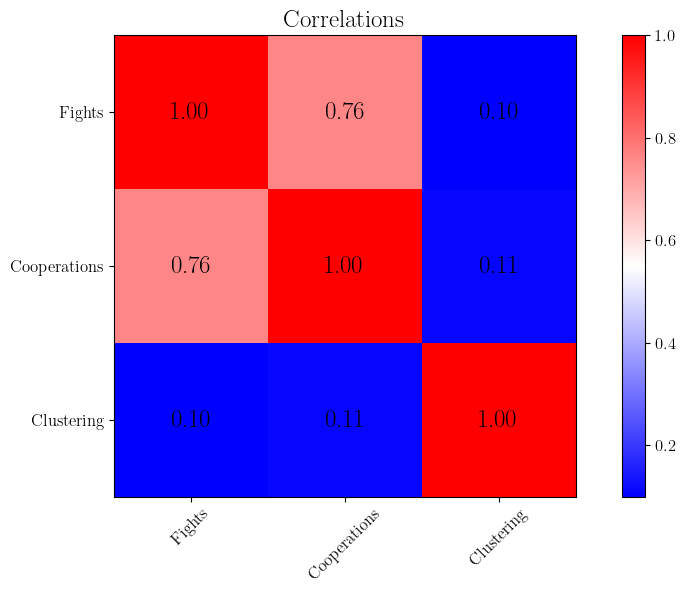

In [15]:
corr_mat(df, outcomes, outcomes)

In [18]:
for out in outcomes:
    # Add a constant to the predictors for statsmodels
    print(f"Fitting: {out}")
    X = sm.add_constant(df[predictors])
    y = df[out]

    # Fit the model using statsmodels
    sm_model = sm.OLS(y, X).fit()

    # Summarize the model
    summary = sm_model.summary()
    print(summary)

    # Extract coefficients and p-values
    coefficients = sm_model.params
    p_values = sm_model.pvalues

    print("Coefficients:")
    print(coefficients)
    print("\nP-values:")
    print(p_values)

Fitting: Fights
                            OLS Regression Results                            
Dep. Variable:                 Fights   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 9.289e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:54:07   Log-Likelihood:            -1.0324e+05
No. Observations:               20480   AIC:                         2.065e+05
Df Residuals:                   20471   BIC:                         2.066e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const             